In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import torch
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import torch_geometric.transforms as T
from torch_geometric.datasets import IMDB
import matplotlib.pyplot as plt

## IMDB

In [2]:
FEATURE_SIZE = 10

In [3]:
dataset = IMDB(root='./imdb_data')
data = dataset[0]
movie = data['movie'].x.tolist()
df = pd.DataFrame(movie)
df['class'] = data['movie'].y.tolist()

In [4]:
def get_selected_features(X):
    col_sum = X.sum(axis=0)
    sorted_colsum = sorted(col_sum, reverse=True)
    colsum_df = pd.DataFrame(col_sum)
    
    sorted_colsum = sorted(col_sum, reverse=True)[:10]
    index_list = list(np.ravel(colsum_df[colsum_df[0].isin(sorted_colsum)].index))
    
    imp_feat = X[index_list]

    return imp_feat

Feature selection from Bag-of-Words features of Movie node

In [5]:
# Feature selection for Movie class 0
class0 = df[df['class'] == 0].drop(['class'], axis=1)
X = class0
imp_feat0 = get_selected_features(class0)
imp_feat0.head()

,87,102,747,1015,1023,1381,1812,1928,2095,2746
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Feature selection for Movie class 1
class1 = df[df['class'] == 1].drop(['class'], axis=1)
X = class1
imp_feat1 = get_selected_features(class1)
imp_feat1.head()

,1023,1111,1381,1624,1654,1866,1900,2393,2439,2774
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Feature selection for Movie class 2
class2 = df[df['class'] == 2].drop(['class'], axis=1)
X = class2
imp_feat2 = get_selected_features(class2)
imp_feat2.head()

,747,1023,1381,1624,1654,1900,1914,1928,2393,2774
21,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Features of each class of Movie node sampled using Diffusion Models

In [8]:
class_path = '../../../../../../graph generator/diffusion models/sampled_features_diffusion/dependence/TabDDPM/imdb/frequency/'

In [9]:
sampled0  = pd.DataFrame(np.load(class_path +'movie0_10.npy',allow_pickle=True)).iloc[:, : FEATURE_SIZE]
sampled0.head()

,0,1,2,3,4,5,6,7,8,9
0,2.0,0.0,0.0,2.0,0.0,3.0,1.0,0.0,0.0,3.0
1,2.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0
2,0.0,3.0,2.0,0.0,3.0,0.0,1.0,0.0,0.0,3.0
3,2.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,3.0
4,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0


In [10]:
sampled1  = pd.DataFrame(np.load(class_path +'movie1_10.npy',allow_pickle=True)).iloc[:, : FEATURE_SIZE]
sampled1.head()

,0,1,2,3,4,5,6,7,8,9
0,4.0,0.0,0.0,3.0,4.0,2.0,5.0,0.0,3.0,5.0
1,0.0,2.0,3.0,3.0,4.0,2.0,5.0,0.0,0.0,5.0
2,0.0,2.0,3.0,3.0,0.0,2.0,5.0,2.0,0.0,0.0
3,0.0,2.0,0.0,3.0,4.0,0.0,5.0,0.0,3.0,5.0
4,4.0,0.0,0.0,0.0,4.0,0.0,5.0,0.0,3.0,5.0


In [11]:
sampled2  = pd.DataFrame(np.load(class_path +'movie2_10.npy',allow_pickle=True)).iloc[:, : FEATURE_SIZE]
sampled2.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,2.0,3.0,3.0,4.0,4.0,3.0,0.0,0.0,4.0
1,0.0,2.0,3.0,3.0,4.0,4.0,3.0,0.0,0.0,4.0
2,3.0,2.0,3.0,3.0,4.0,4.0,3.0,0.0,0.0,0.0
3,3.0,0.0,0.0,3.0,4.0,0.0,3.0,3.0,3.0,4.0
4,0.0,2.0,0.0,0.0,4.0,4.0,3.0,0.0,3.0,4.0


In [12]:
def cosine_sim(original,sampled):
    return cosine_similarity(original, sampled)

### Pairwise cosine similarity of all features for real and synthetic distributions

Movie class 0

In [13]:
real_class0= np.array(imp_feat0)
cosine_sim(real_class0,sampled0)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.81649658, 0.46291005, 0.375     , ..., 0.5       , 0.        ,
        0.77459667],
       [0.13608276, 0.3086067 , 0.375     , ..., 0.5       , 0.14744196,
        0.25819889],
       [0.        , 0.43643578, 0.35355339, ..., 0.47140452, 0.        ,
        0.36514837]])

<AxesSubplot:>

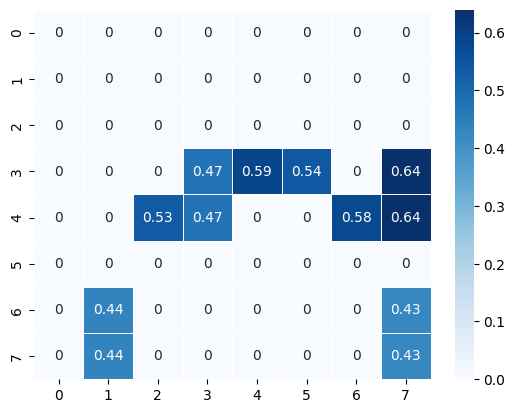

In [14]:
sns.heatmap(cosine_sim(real_class0[:8],sampled0[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)

In [15]:
avg_cossim_class0 = np.mean(cosine_sim(real_class0,sampled0))
avg_cossim_class0

0.0827680649373596

Movie class 1

In [16]:
real_class1= np.array(imp_feat1)
cosine_sim(real_class1,sampled1)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.31277162, 0.40451992, ..., 0.        , 0.        ,
        0.30460385],
       [0.        , 0.20851441, 0.26967994, ..., 0.32879797, 0.25197632,
        0.20306923],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

<AxesSubplot:>

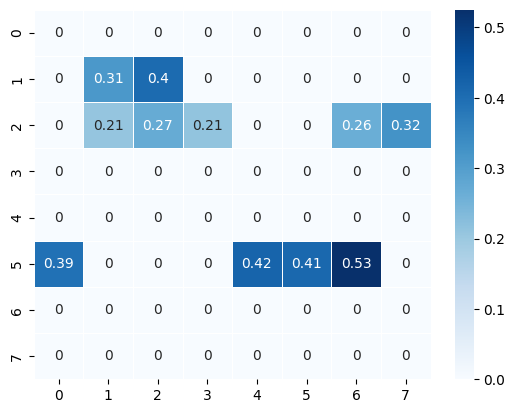

In [17]:
sns.heatmap(cosine_sim(real_class1[:8],sampled1[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)

In [18]:
avg_cossim_class1 = np.mean(cosine_sim(real_class1,sampled1))
avg_cossim_class1

0.09690245717833308

Movie class 2

In [19]:
real_class2= np.array(imp_feat2)
cosine_sim(real_class2,sampled2)

array([[0.33752637, 0.33752637, 0.35355339, ..., 0.        , 0.        ,
        0.30460385],
       [0.5568901 , 0.5568901 , 0.25      , ..., 0.5568901 , 0.57154761,
        0.50257071],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

<AxesSubplot:>

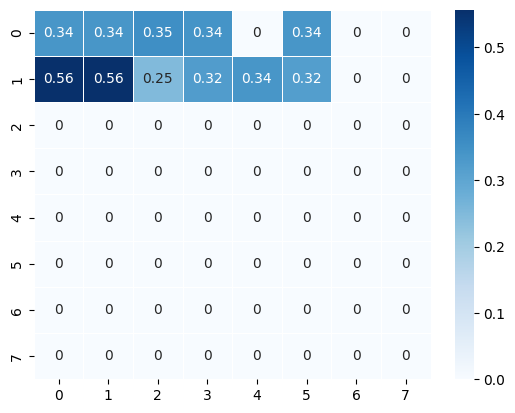

In [20]:
sns.heatmap(cosine_sim(real_class2[:8],sampled2[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)

In [21]:
avg_cossim_class2 = np.mean(cosine_sim(real_class2,sampled2))
avg_cossim_class2

0.08988483929516723

In [22]:
(avg_cossim_class0 + avg_cossim_class1 +avg_cossim_class2)/3

0.0898517871369533